In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import warnings

In [2]:
n=190
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

In [3]:
G = nx.read_gml('dolphins.gml')

In [4]:
print(nx.is_directed(G))

False


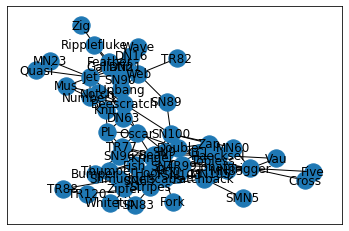

In [5]:
nx.draw_networkx(G)

In [6]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nG, G_map=conv2int(G,0)

In [7]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]])

<BarContainer object of 12 artists>

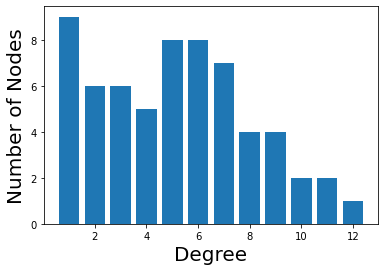

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [10]:
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show() 

<BarContainer object of 12 artists>

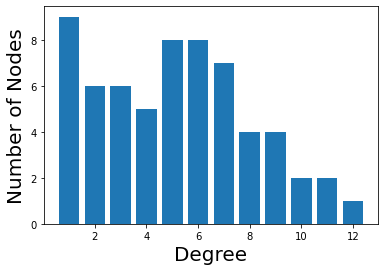

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
12


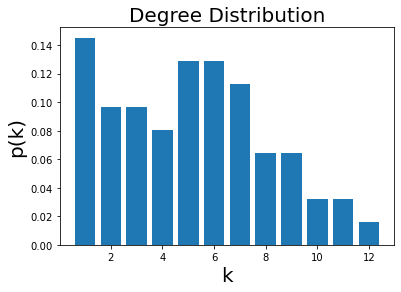

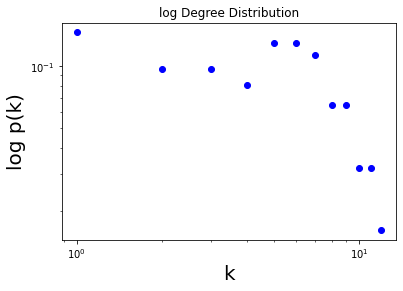

In [12]:
plot_degree_dist(G)

In [13]:
def comd_SP(G,k):
  A = nx.adjacency_matrix(G).todense()
  best = 0
  best_coms = None
  for i in range(1,k+1):
    clustering = SpectralClustering(n_clusters=i).fit(A)
    com = []
    for u in np.unique(clustering.labels_):
      subl = [x for x in range(len(clustering.labels_)) if clustering.labels_[x]==u]
      com.append(subl)
    mod = nx.algorithms.community.quality.modularity(G,com)
    if (mod > best):
      best = mod
      best_coms = com
  return best_coms

In [15]:
SP_coms = {
    'G':comd_SP(nG,50)
}

C:\Users\musta\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
C:\Users\musta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\musta\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
C:\Users\musta\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarnin

In [17]:
pos = {
  'G':nx.fruchterman_reingold_layout(nG)
}

In [18]:
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [19]:
def visual_com(G,nodelist, pos):
  nx.draw_networkx_edges(G, pos=pos)
  for (nodes,i) in zip(nodelist,range(len(nodelist))):
    nx.draw_networkx_nodes(G, pos=pos ,nodelist=nodes ,node_color=colors[i])

In [20]:
def subplots(G,G_name):
  gs = gridspec.GridSpec(2, 2)
  fig = plt.figure(figsize=(20,15))
  ax2 = fig.add_subplot(gs[0, 1])
  visual_com(G,SP_coms[G_name], pos[G_name])
  ax2.set_title('Spectral clustering')
  plt.show()

In [21]:
def print_mods(G, G_name):
  print("Spectral Clustering: %f" %nx.algorithms.community.quality.modularity(G,SP_coms[G_name]))

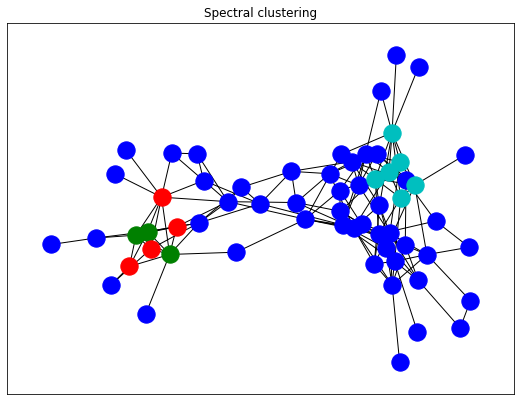

In [23]:
subplots(nG,'G')

In [25]:
print("Modularities for Dolphins Graph")
print_mods(nG,'G')

Modularities for Dolphins Graph
Spectral Clustering: 0.173708
